# Advanced Machine Learning
## Exercise Sheet 8
### Task 3

In [32]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

## (a)

In [33]:
N = int(1e5)

X, y = make_blobs(
    n_samples=N,
    n_features=2,
    centers=2,
    cluster_std=1.5,
    random_state=42
)
print(f"{X.shape=}\n{y.shape=}")

X.shape=(100000, 2)
y.shape=(100000,)


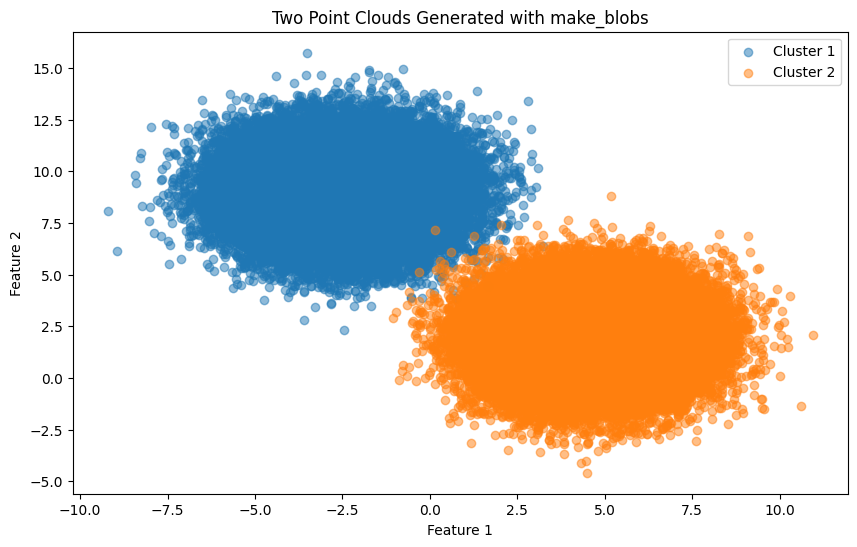

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.5, label="Cluster 1")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.5, label="Cluster 2")
plt.title("Two Point Clouds Generated with make_blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## (b)

In [35]:
def error_bound(n, d, delta=0.05):
    return np.sqrt((8 / n) * (d * np.log((2 * np.exp(1) * n) / d) + np.log(4 / delta)))

In [47]:
d = 5
T = 10
sizes_training_samples = np.arange(start=50, stop=500+1, step=50)

error_bounds = list()
all_empirical_risks = list()
all_true_risks = list()

for n in sizes_training_samples:
    error_bounds.append(error_bound(n=n, d=d))
    empirical_risks = 0
    true_risks = 0
    for t in range(T):
        # Draw a training set of size n
        indices = np.random.choice(N, size=n, replace=False)
        X_sample = X[indices]
        Y_sample = y[indices]

        # Fit model to training data
        model = LogisticRegression()
        model.fit(X_sample, Y_sample)

        # Determine empirical and true risk of the learned model
        empirical_risks += np.sum(model.predict(X_sample) != Y_sample) / Y_sample.shape[0]
        true_risks += np.sum(model.predict(X) != y) / y.shape[0]

    all_empirical_risks.append(empirical_risks/T)
    all_true_risks.append(true_risks/T)

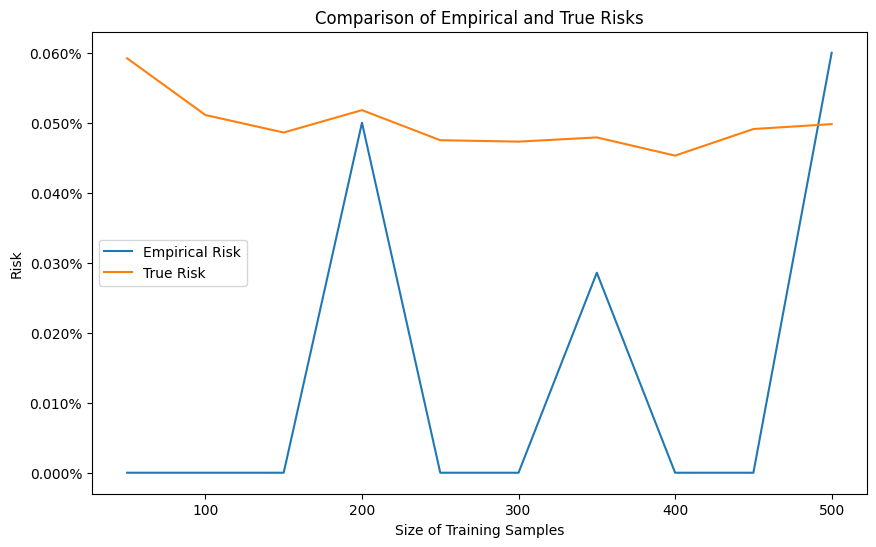

In [49]:
import matplotlib.ticker as mticker

# Assuming sizes_training_samples, all_empirical_risks, and all_true_risks are defined
# Convert the risk values to percentages
all_empirical_risks_percent = [risk * 100 for risk in all_empirical_risks]
all_true_risks_percent = [risk * 100 for risk in all_true_risks]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sizes_training_samples, all_empirical_risks_percent, label='Empirical Risk')
plt.plot(sizes_training_samples, all_true_risks_percent, label='True Risk')

# Setting the y-axis label to show percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

plt.xlabel("Size of Training Samples")
plt.ylabel("Risk")
plt.title("Comparison of Empirical and True Risks")
plt.legend()
plt.show()